# 0. 라이브러리 및 데이터

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 

In [301]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

# id : 구분자
# rho : 측정 거리 (단위: mm)
# src : 광원 스펙트럼 (650 nm ~ 990 nm)
# dst : 측정 스펙트럼 (650 nm ~ 990 nm)

# hhb : 디옥시헤모글로빈 농도
# hbo2 : 옥시헤모글로빈 농도
# ca : 칼슘 농도
# na : 나트륨 농도

In [218]:
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [219]:
test.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [220]:
print ("Size of train data : {}" .format(train.shape))
print ("Size of test data : {}" .format(test.shape))

Size of train data : (10000, 76)
Size of test data : (10000, 72)


In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
id         10000 non-null int64
rho        10000 non-null int64
650_src    10000 non-null float64
660_src    10000 non-null float64
670_src    10000 non-null float64
680_src    10000 non-null float64
690_src    10000 non-null float64
700_src    10000 non-null float64
710_src    10000 non-null float64
720_src    10000 non-null float64
730_src    10000 non-null float64
740_src    10000 non-null float64
750_src    10000 non-null float64
760_src    10000 non-null float64
770_src    10000 non-null float64
780_src    10000 non-null float64
790_src    10000 non-null float64
800_src    10000 non-null float64
810_src    10000 non-null float64
820_src    10000 non-null float64
830_src    10000 non-null float64
840_src    10000 non-null float64
850_src    10000 non-null float64
860_src    10000 non-null float64
870_src    10000 non-null float64
880_src    10000 non-null float64
890_src    1

# 1. 탐색적 자료 분석

## 1.1 결측치 확인

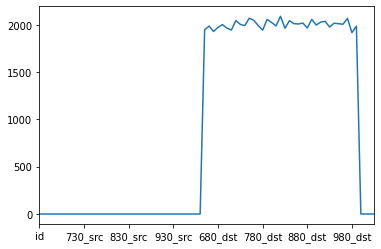

In [222]:
train.isnull().sum().plot()

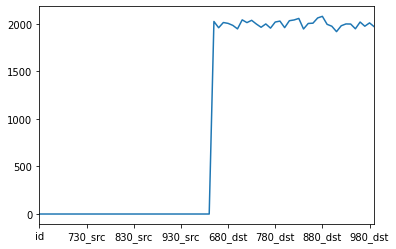

In [223]:
test.isnull().sum().plot()

In [224]:
train.isnull().sum()[train.isnull().sum().values > 0]

650_dst    1948
660_dst    1988
670_dst    1931
680_dst    1975
690_dst    2003
700_dst    1966
710_dst    1946
720_dst    2046
730_dst    2006
740_dst    1993
750_dst    2071
760_dst    2050
770_dst    1994
780_dst    1945
790_dst    2059
800_dst    2026
810_dst    1990
820_dst    2091
830_dst    1965
840_dst    2045
850_dst    2014
860_dst    2010
870_dst    2020
880_dst    1968
890_dst    2059
900_dst    1999
910_dst    2030
920_dst    2038
930_dst    1978
940_dst    2018
950_dst    2013
960_dst    2008
970_dst    2069
980_dst    1919
990_dst    1987
dtype: int64

In [225]:
test.isnull().sum()[test.isnull().sum().values > 0]

650_dst    2026
660_dst    1960
670_dst    2015
680_dst    2006
690_dst    1985
700_dst    1948
710_dst    2043
720_dst    2014
730_dst    2038
740_dst    1999
750_dst    1965
760_dst    2000
770_dst    1956
780_dst    2020
790_dst    2030
800_dst    1961
810_dst    2034
820_dst    2042
830_dst    2058
840_dst    1947
850_dst    2005
860_dst    2008
870_dst    2063
880_dst    2080
890_dst    1996
900_dst    1976
910_dst    1919
920_dst    1981
930_dst    2000
940_dst    1999
950_dst    1949
960_dst    2020
970_dst    1976
980_dst    2011
990_dst    1970
dtype: int64

In [226]:
print(train.isnull().sum()[train.isnull().sum().values > 0].index)

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')


In [227]:
print(test.isnull().sum()[test.isnull().sum().values > 0].index)

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')


## 1.2 데이터의 의미 파악

### 1.2.1 광원 스펙트럼

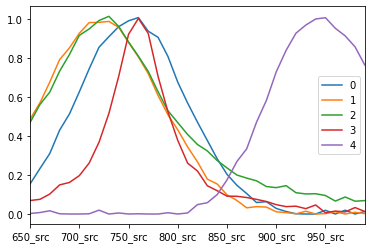

In [228]:
test.filter(regex='_src$', axis=1).head().T.plot()

### 1.2.2 측정 스펙트럼

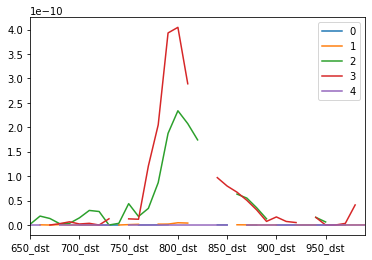

In [229]:
test.filter(regex='_dst$', axis=1).head().T.plot()

# 2. 데이터 정리

## 2.1 결측치 보간

In [303]:
train_dst = train.filter(regex='_dst$', axis=1)
test_dst = test.filter(regex='_dst$', axis=1)
test_dst.head()

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,0.000000e+00,NaN,7.028318e-15,NaN,NaN,2.191340e-14,2.204989e-14,0.000000e+00,0.000000e+00,1.306867e-15,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,NaN,3.744801e-13,1.190392e-14,9.131521e-13,1.796724e-14,1.081485e-14,0.000000e+00,0.000000e+00,NaN,1.810959e-14,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,1.732202e-12,1.827363e-11,1.332869e-11,2.641682e-12,3.498661e-12,1.466659e-11,2.981251e-11,2.764069e-11,0.000000e+00,3.423157e-12,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,0.000000e+00,NaN,0.000000e+00,2.713471e-12,6.567726e-12,2.069053e-12,3.467277e-12,0.000000e+00,1.275280e-11,NaN,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,0.000000e+00,4.030214e-17,NaN,2.500016e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.969590e-17,1.461565e-18,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [304]:
# interpolate():실측값과 실측값 사이의 결측값을 마치 '그라데이션(gradation)' 기법으로 색깔을 조금씩 변화시켜가면서 부드럽게 채워나가는 방법
train_dst = train_dst.interpolate(method='linear', axis=1)
test_dst = test_dst.interpolate(method='linear', axis=1)

train_dst.fillna(0, inplace=True)
test_dst.fillna(0, inplace=True)
test_dst.head()

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,0.000000e+00,3.514159e-15,7.028318e-15,1.199001e-14,1.695171e-14,2.191340e-14,2.204989e-14,0.000000e+00,0.000000e+00,1.306867e-15,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,3.660118e-14,7.320236e-14
1,0.000000e+00,3.744801e-13,1.190392e-14,9.131521e-13,1.796724e-14,1.081485e-14,0.000000e+00,0.000000e+00,9.054795e-15,1.810959e-14,...,1.036013e-13,6.595554e-14,2.830975e-14,1.114337e-13,4.825731e-14,3.554108e-14,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,1.732202e-12,1.827363e-11,1.332869e-11,2.641682e-12,3.498661e-12,1.466659e-11,2.981251e-11,2.764069e-11,0.000000e+00,3.423157e-12,...,1.325728e-11,1.386598e-11,1.447468e-11,1.508338e-11,1.569208e-11,6.242378e-12,9.216241e-12,1.219010e-11,1.219010e-11,1.219010e-11
3,0.000000e+00,0.000000e+00,0.000000e+00,2.713471e-12,6.567726e-12,2.069053e-12,3.467277e-12,0.000000e+00,1.275280e-11,1.266541e-11,...,1.651177e-11,7.282747e-12,5.010879e-12,1.036055e-11,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,4.106134e-11
4,0.000000e+00,4.030214e-17,3.265115e-17,2.500016e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.969590e-17,1.461565e-18,5.603958e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


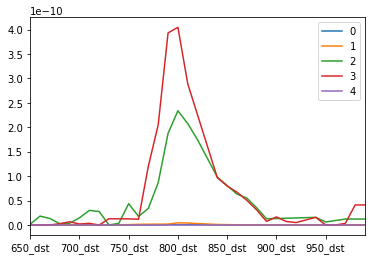

In [232]:
test_dst.head().T.plot()

In [305]:
train.update(train_dst)
test.update(test_dst)

In [234]:
train.to_csv('./data/train_fix.csv')
test.to_csv('./data/test_fix.csv')

## 3. 데이터 전처리

## 3.1 상관관계 분석

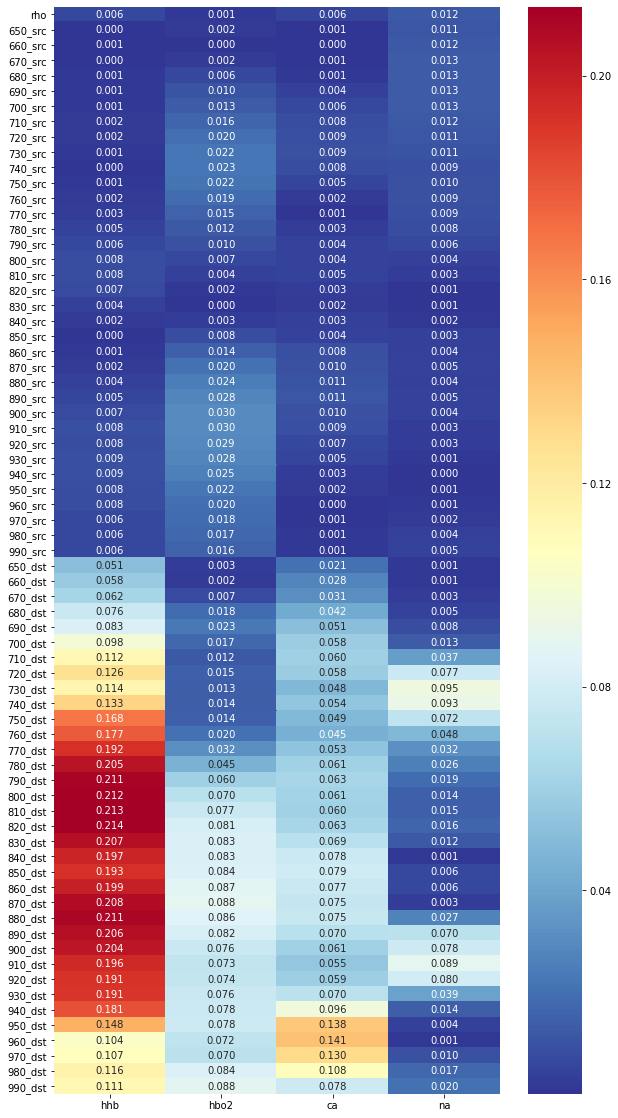

In [235]:
plt.figure(figsize=(10,20))
sns.heatmap(train.corr().loc['rho':'990_dst', 'hhb':].abs(), fmt='.3f', annot=True, cmap='RdYlBu_r')

## 3.2 다중공선성 확인

In [236]:
feature_columns = list(train.columns.difference(['id','rho','hhb','hbo2','ca','na']))
X_train = train[feature_columns]
Y_train = train.loc[:, 'hhb':'na']

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns

vif

,VIF Factor,features
0,7.777195,650_dst
1,328.822780,650_src
2,65.537514,660_dst
3,782.016221,660_src
4,87.707774,670_dst
...,...,...
65,1019.896661,970_src
66,45.742212,980_dst
67,864.882678,980_src
68,21.897935,990_dst


In [239]:
vif.describe()

,VIF Factor
count,70.000000
mean,775.714069
std,633.977639
min,7.777195
25%,75.948919
50%,831.597871
75%,1418.706147
max,1659.756908


In [240]:
X_train2 = train.loc[:,'650_dst':'990_dst']
Y_train2 = train.loc[:, 'hhb':'na']

In [241]:
vif2 = pd.DataFrame()
vif2['VIF Factor'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif2['features'] = X_train2.columns

vif2

,VIF Factor,features
0,7.721357,650_dst
1,65.338702,660_dst
2,87.376365,670_dst
3,36.233956,680_dst
4,32.636349,690_dst
5,47.211715,700_dst
6,52.593775,710_dst
7,37.071972,720_dst
8,32.164879,730_dst
9,46.869056,740_dst


## 3.4 PCA

In [294]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)

# 1. PCA 객체 생성
# 2. fit 메서드를 호출해 주성분 찾기
# 3. transform 메서드를 호출해 데이터 호출시키고 차원 축소하기
pca = PCA(n_components=10)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [295]:
cumsum = np.cumsum(pca.explained_variance_ratio_) # 분산의 설명량 누적합
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :',d)

선택할 차원 수 : 6


In [296]:
pca_result = PCA(n_components=0.95)
new_d = pca_result.fit_transform(X_train_scaled)
new_d = pd.DataFrame(new_d)
new_d

,0,1,2,3,4,5
0,-0.930745,0.215848,-0.055333,-0.047244,-0.031104,0.001726
1,31.186936,-30.633773,37.335985,3.440476,5.130980,11.074014
2,-0.930745,0.215848,-0.055333,-0.047244,-0.031104,0.001726
3,3.199581,0.177617,-1.232768,0.557991,1.034736,0.088026
4,-0.929645,0.215934,-0.054826,-0.047576,-0.030681,0.001445
...,...,...,...,...,...,...
9995,-0.930488,0.216102,-0.055297,-0.047184,-0.031072,0.001697
9996,-0.930742,0.215846,-0.055332,-0.047244,-0.031102,0.001725
9997,0.025480,-0.027910,-0.038428,-0.076251,0.127421,0.107459
9998,-0.920304,0.212271,-0.052576,-0.047562,-0.024136,0.002250


In [306]:
# test 데이터 pca 
X_test = test.loc[:,'650_dst':'990_dst']
X_test_scaled = scaler.fit_transform(X_test)

pca_test = PCA(n_components=10)
pca_test.fit(X_test_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [308]:
cumsum_test = np.cumsum(pca_test.explained_variance_ratio_)
d_test = np.argmax(cumsum_test >= 0.94) + 1
print('선택할 차원 수 :',d_test)

선택할 차원 수 : 6


In [309]:
pca_test_result = PCA(n_components=0.94)
test_new_d = pca_test_result.fit_transform(X_test_scaled)
test_new_d = pd.DataFrame(test_new_d)
test_new_d

,0,1,2,3,4,5
0,-1.082588,0.196379,0.070466,0.078536,-0.054276,0.019860
1,-1.073626,0.202535,0.072136,0.082830,-0.050894,0.020122
2,-0.573661,0.428055,0.056642,0.113013,0.002540,0.035679
3,-0.561802,0.335750,-0.203481,0.090921,0.196358,-0.186917
4,-1.083707,0.195993,0.070985,0.078248,-0.054904,0.020155
...,...,...,...,...,...,...
9995,-1.074563,0.191441,0.069866,0.079322,-0.054981,0.020225
9996,-1.083708,0.195994,0.070984,0.078248,-0.054904,0.020154
9997,-1.082716,0.197263,0.071402,0.077417,-0.055270,0.020769
9998,-1.083708,0.195994,0.070984,0.078248,-0.054904,0.020155


# 4. 모델 학습 및 검증

In [310]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

x_train = new_d
y_train = Y_train
test = test_new_d
x_train.shape, y_train.shape

((10000, 6), (10000, 4))

## 4.1 Xgboost

In [288]:
def train_model(x_data, y_data, k=5):
    models = []
    
    k_fold = KFold(n_splits=k, shuffle=True, random_state=123)
    
    for train_idx, val_idx in k_fold.split(x_data):
        x_train, y_train = x_data.iloc[train_idx], y_data[train_idx]
        x_val, y_val = x_data.iloc[val_idx], y_data[val_idx]
    
        d_train = xgb.DMatrix(data = x_train, label = y_train)
        d_val = xgb.DMatrix(data = x_val, label = y_val)
        
        wlist = [(d_train, 'train'), (d_val, 'eval')]
        
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'seed':777
            }

        model = xgb.train(params=params, dtrain=d_train, num_boost_round=500, verbose_eval=500, evals=wlist)
        models.append(model)
    
    return models

In [209]:
# 첫번째 pca 결과 (dst변수들로만 pca)
# src변수들까지 pca한 결과도 좋지않았음

models = {}
for label in y_train.columns:
    print('train column : ', label)
    models[label] = train_model(x_train, y_train[label])
    print('\n\n')

train column :  hhb
[0]	train-mae:5.31504	eval-mae:5.29972
[499]	train-mae:0.35413	eval-mae:1.83804
[0]	train-mae:5.31982	eval-mae:5.26832
[499]	train-mae:0.37280	eval-mae:1.83878
[0]	train-mae:5.31279	eval-mae:5.31412
[499]	train-mae:0.36242	eval-mae:1.91351
[0]	train-mae:5.30701	eval-mae:5.35640
[499]	train-mae:0.35328	eval-mae:1.89406
[0]	train-mae:5.30595	eval-mae:5.35980
[499]	train-mae:0.35869	eval-mae:1.83649



train column :  hbo2
[0]	train-mae:2.46005	eval-mae:2.47324
[499]	train-mae:0.16848	eval-mae:0.82865
[0]	train-mae:2.45975	eval-mae:2.47624
[499]	train-mae:0.16915	eval-mae:0.80412
[0]	train-mae:2.46808	eval-mae:2.42597
[499]	train-mae:0.16932	eval-mae:0.82334
[0]	train-mae:2.45974	eval-mae:2.48249
[499]	train-mae:0.17191	eval-mae:0.83059
[0]	train-mae:2.46344	eval-mae:2.45112
[499]	train-mae:0.16365	eval-mae:0.82280



train column :  ca
[0]	train-mae:5.99459	eval-mae:6.08220
[499]	train-mae:0.51414	eval-mae:2.47824
[0]	train-mae:6.00371	eval-mae:6.02514
[499]	train-mae

In [210]:
for col in models:
    preds = []
    for model in models[col]:
        preds.append(model.predict(xgb.DMatrix(test2)))
    pred = np.mean(preds, axis=0)

    submission[col] = pred

In [211]:
submission.head()

,id,hhb,hbo2,ca,na
0,10000,7.411786,1.484793,2.153522,5.698865
1,10001,6.690057,1.439134,2.147556,5.505691
2,10002,8.269391,4.978883,10.100001,3.723159
3,10003,11.792593,3.287865,5.488902,4.578815
4,10004,6.450319,1.534948,1.829454,5.586899


In [212]:
submission.to_csv('Dacon_baseline.csv', index=False)

- 리더보드 점수 : 3.3637031435
- pca 별론듯